# Avance de proyecto 1: Sistema de Recomendación 

Integrantes Equipo 16.
- David Nava Jiménez - A01168501 
- Edwin David Hernández Alejandre - A01794692 
- Jorge Fernando Bonilla Diaz - A01793935 

## 1. Exploracion y Analisis de datos

El análisis de datos de películas es una tarea crucial para comprender las tendencias y patrones en la industria cinematográfica. Este estudio se centra en un conjunto de datos que contiene información detallada sobre diversas películas, abarcando desde detalles financieros hasta características de producción y recepciones críticas. La base de datos incluye columnas como presupuesto (budget), ingresos (revenue), duración (runtime), promedio de votos (vote_average), cantidad de votos (vote_count), entre otras.

El objetivo de este análisis exploratorio de datos (EDA) es descubrir información valiosa y patrones ocultos en los datos, así como identificar relaciones significativas entre diferentes variables. A través de este EDA, se busca responder preguntas clave, tales como:

- ¿Qué géneros de películas son los más comunes?
- ¿Existe una correlación entre el presupuesto de una película y sus ingresos?
- ¿Cómo varía la duración de las películas en diferentes géneros?
- ¿Qué factores influyen en el promedio de votos y en la cantidad de votos recibidos por una película?
- Para lograr esto, se realizará una inspección detallada de los datos, incluyendo un análisis de la distribución de las variables numéricas y categóricas, la - identificación de valores faltantes y la evaluación de correlaciones entre variables clave.

Este análisis no solo proporcionará una visión general del estado actual de la industria cinematográfica, sino que también servirá como una base sólida para estudios futuros y decisiones informadas en el ámbito del cine.

In [28]:
import os
# Obtener la ruta del directorio actual
current_directory = os.getcwd()
print(current_directory)
# Cambiar el directorio de trabajo actual a 'new_directory'
#os.chdir('.//TC4034.10//RecommendationSystem//Data')
# Verificar el cambio imprimiendo el directorio de trabajo actual
print(os.getcwd())

c:\git\TecMonterrrey\BigData\TC4034.10\RecommendationSystem\Data
c:\git\TecMonterrrey\BigData\TC4034.10\RecommendationSystem\Data


##### Inspección de los datos

Muestra las primeras filas del DataFrame y proporciona un resumen estadístico de los datos. También verifica y muestra la cantidad de valores faltantes en cada columna.

Convierte las columnas 'budget' y 'revenue' a números, forzando los errores a NaN (Not a Number). Luego, reemplaza los valores 0 en estas columnas por NaN.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
%matplotlib inline
from ast import literal_eval
# Ignore warnings
import warnings
# Ignorar todas las advertencias
warnings.filterwarnings('ignore')

In [18]:
# Cargar el archivo CSV
file_path = 'movies_metadata.csv' 
movies_df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe para inspeccionar los datos
print(movies_df.head())

# Resumen estadístico de los datos
summary = movies_df.describe(include='all')

# Verificación de valores faltantes
missing_values = movies_df.isnull().sum()

print(summary)
print(missing_values)

# Convertir las columnas 'budget' y 'revenue' a números, forzando errores a NaN
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')

# Reemplazar los valores 0 por NaN
movies_df['budget'] = movies_df['budget'].replace(0, np.nan)
movies_df['revenue'] = movies_df['revenue'].replace(0, np.nan)

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [27]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 8890 non-null   float64
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

#### Resumen Estadístico
- adult: Columna con valores booleanos que indica si la película es para adultos.
- belongs_to_collection: Información sobre si la película pertenece a una colección; muchos valores faltantes (40972).
- budget: Presupuesto de la película; presenta una alta frecuencia de valores cero.
- genres: Lista de géneros; 4069 valores únicos.
- homepage: URL de la página oficial de la película; muchos valores faltantes (37684).
- id: Identificador único de la película.
- imdb_id: Identificador en IMDb; 17 valores faltantes.
- original_language: Idioma original de la película; 11 valores faltantes.
- original_title: Título original de la película.
- overview: Resumen de la película; 954 valores faltantes.
- popularity: Popularidad de la película.
- poster_path: Ruta del póster de la película; 386 valores faltantes.
- production_companies: Empresas de producción; 3 valores faltantes.
- production_countries: Países de producción; 3 valores faltantes.
- release_date: Fecha de lanzamiento; 87 valores faltantes.
- revenue: Ingresos de la película; 6 valores faltantes.
- runtime: Duración de la película; 263 valores faltantes.
- spoken_languages: Idiomas hablados en la película; 6 valores faltantes.
- status: Estado de la película (lanzada, en producción, etc.); 87 valores faltantes.
- tagline: Frase publicitaria de la película; muchos valores faltantes (25054).
- title: Título de la película; 6 valores faltantes.
- video: Indica si hay un video asociado; 6 valores faltantes.
- vote_average: Promedio de votos.
- vote_count: Número de votos.

### Visualización de los datos
Genera gráficos de distribución para varias columnas ('budget', 'revenue', 'runtime', 'vote_average', 'vote_count').

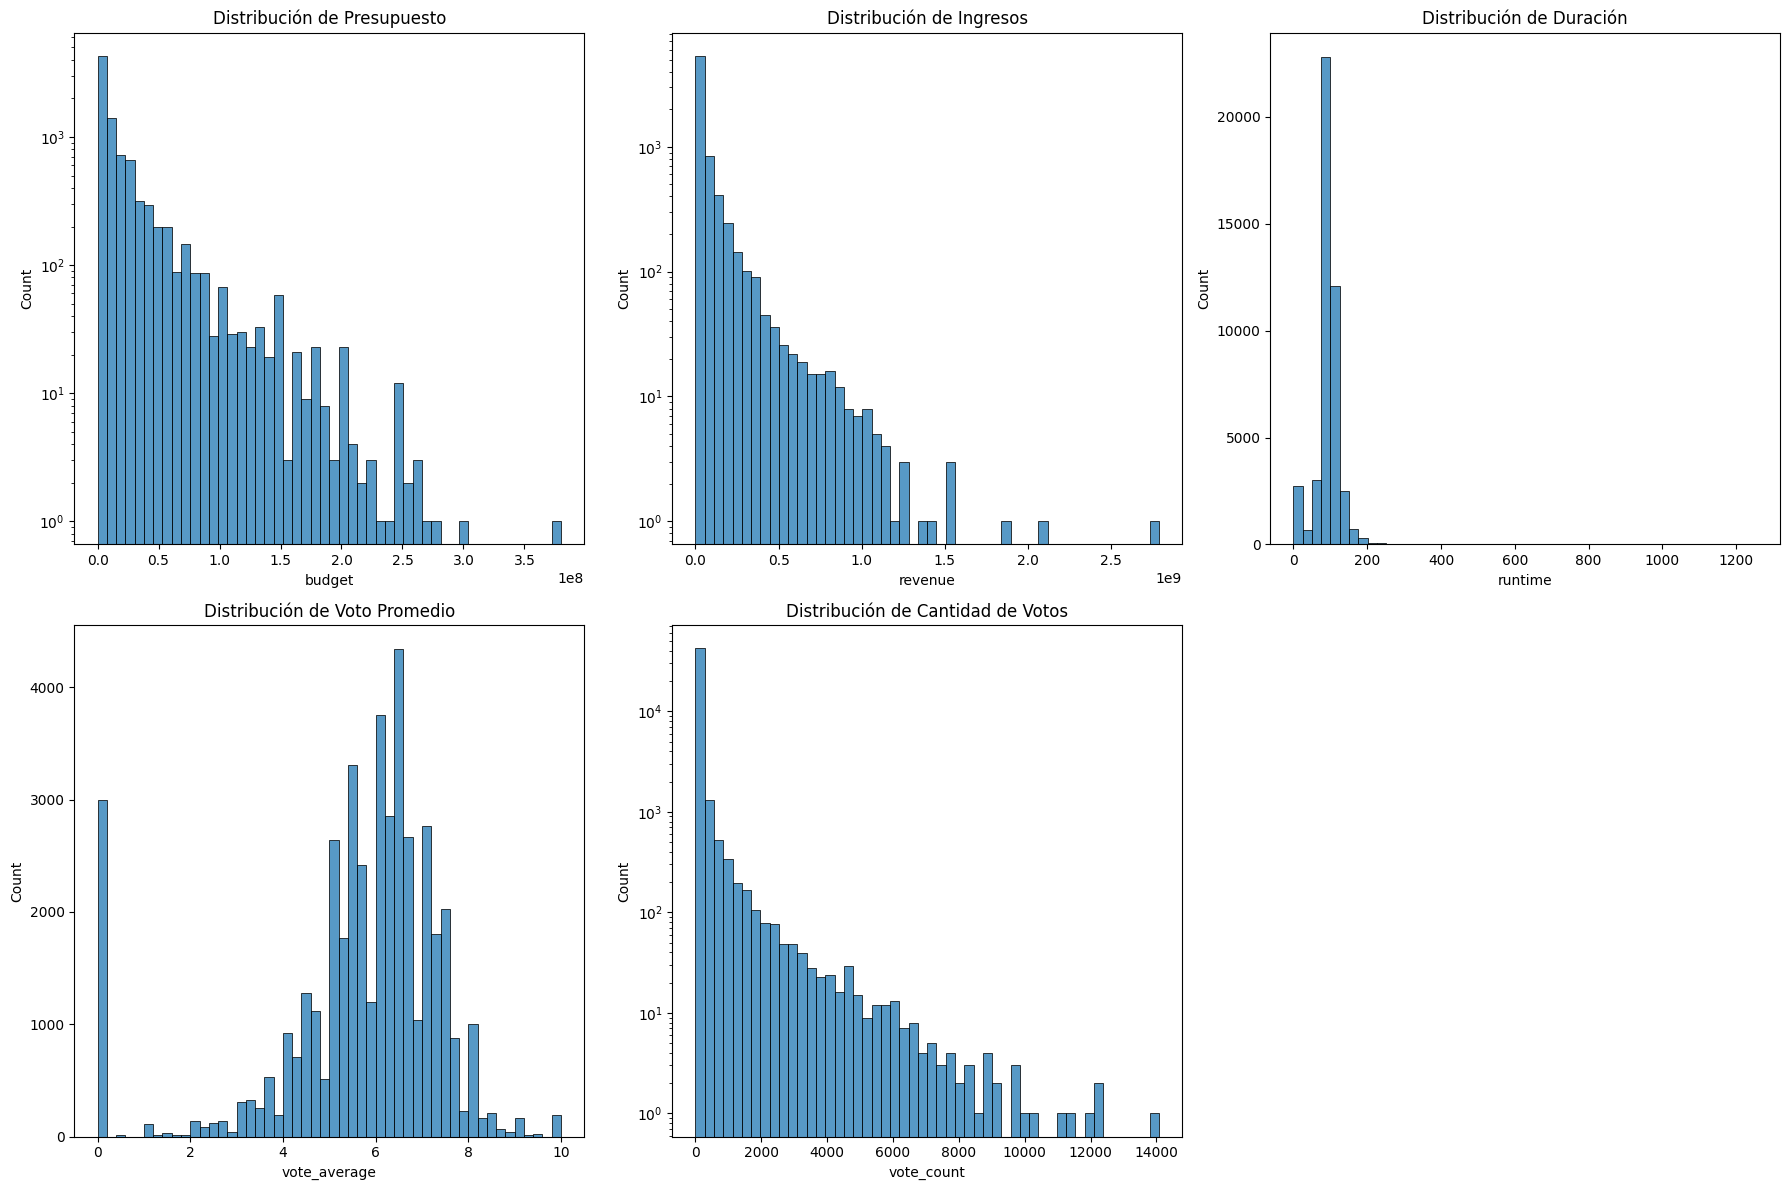

In [25]:
# Volver a generar los gráficos de distribución
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribución de 'budget'
sns.histplot(movies_df['budget'].dropna(), bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Presupuesto')
axes[0, 0].set_yscale('log')

# Distribución de 'revenue'
sns.histplot(movies_df['revenue'].dropna(), bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Ingresos')
axes[0, 1].set_yscale('log')

# Distribución de 'runtime'
sns.histplot(movies_df['runtime'].dropna(), bins=50, ax=axes[0, 2])
axes[0, 2].set_title('Distribución de Duración')

# Distribución de 'vote_average'
sns.histplot(movies_df['vote_average'].dropna(), bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Voto Promedio')

# Distribución de 'vote_count'
sns.histplot(movies_df['vote_count'].dropna(), bins=50, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Cantidad de Votos')
axes[1, 1].set_yscale('log')

# Remover el último subplot vacío
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

##### Distribución de Presupuesto (budget):

- > La mayoría de las películas tienen un presupuesto bajo.
- > Hay una caída exponencial en la cantidad de películas a medida que el presupuesto aumenta.
- > Pocos casos de películas con presupuestos extremadamente altos.

##### Distribución de Ingresos (revenue):

- > Similar al presupuesto, la mayoría de las películas generan ingresos bajos.
- > También hay una caída exponencial en la cantidad de películas a medida que los ingresos aumentan.
- > Algunos casos de películas con ingresos extremadamente altos.

##### Distribución de Duración (runtime):

- > La mayoría de las películas tienen una duración alrededor de 100 a 150 minutos.
- > Hay muy pocas películas con duraciones extremadamente largas (más de 200 minutos).
- > La gráfica muestra una distribución sesgada a la derecha.

##### Distribución de Voto Promedio (vote_average):

- > La mayoría de las películas tienen un voto promedio entre 5 y 7.
- > La distribución es más simétrica y tiene un pico alrededor de 6.
- > Hay algunas películas con votos promedio extremos, tanto bajos como altos.

##### Distribución de Cantidad de Votos (vote_count):

- > La mayoría de las películas tienen un número bajo de votos.
- > Hay una caída exponencial en la cantidad de películas a medida que el número de votos aumenta.
- > Pocas películas tienen una cantidad extremadamente alta de votos.

> En resumen, la mayoría de las variables muestran distribuciones sesgadas a la derecha, con muchas películas en las categorías de bajo presupuesto, ingresos y cantidad de votos, y menos películas en las categorías de alto presupuesto, ingresos y cantidad de votos. La duración y el voto promedio muestran distribuciones más simétricas.

### Análisis de correlación
Calcula y muestra una matriz de correlación para varias columnas numéricas.

- Análisis de correlación: Calcula la matriz de correlación entre las columnas 'budget', 'revenue', 'runtime', 'vote_average' y 'vote_count' del DataFrame movies_df. La correlación mide la relación lineal entre dos variables. Los valores de correlación varían entre -1 y 1, donde -1 indica una relación lineal negativa perfecta, 1 indica una relación lineal positiva perfecta, y 0 indica que no hay relación lineal. 

- Análisis de géneros: Primero, extrae y cuenta los géneros de las películas. Para cada película, la columna 'genres' contiene una lista de géneros, que se extraen y se aplanan en una sola lista de géneros. Luego, se cuenta la ocurrencia de cada género utilizando la clase Counter de la biblioteca collections. Después, se convierte este contador en un DataFrame de pandas y se ordena por la columna 'Count' en orden descendente. 

In [22]:

# Análisis de correlación entre variables numéricas
correlation_matrix = movies_df[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                budget   revenue   runtime  vote_average  vote_count
budget        1.000000  0.730271  0.223296      0.094979    0.619909
revenue       0.730271  1.000000  0.202615      0.149402    0.781789
runtime       0.223296  0.202615  1.000000      0.158146    0.113539
vote_average  0.094979  0.149402  0.158146      1.000000    0.123607
vote_count    0.619909  0.781789  0.113539      0.123607    1.000000


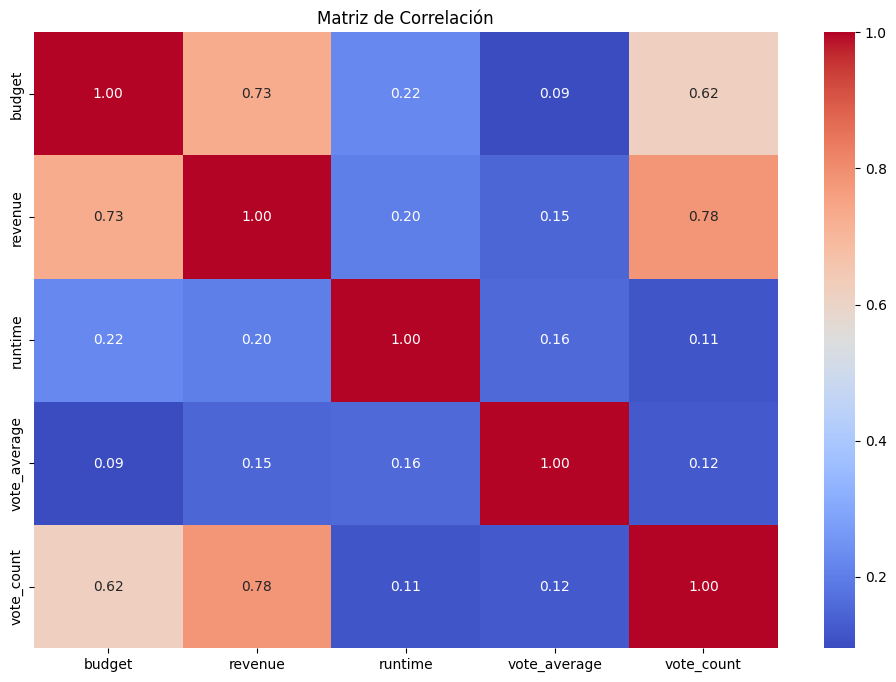

In [23]:
# Usando seaborns para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


En resumen, las correlaciones más fuertes se observan entre presupuesto e ingresos, y entre ingresos y cantidad de votos, lo que indica que las películas con mayores presupuestos tienden a generar más ingresos y recibir más votos. La duración de las películas y el voto promedio tienen correlaciones más débiles con las demás variables.

### Análisis de géneros
Extrae y cuenta los géneros de las películas. Luego, convierte el contador de géneros en un DataFrame y muestra los géneros más comunes.

In [24]:
# Exploración de la variable 'genres'
# Extraer y contar los géneros
genres_list = movies_df['genres'].dropna().apply(lambda x: [genre['name'] for genre in ast.literal_eval(x)])
genres_flat = [genre for sublist in genres_list for genre in sublist]
genres_count = Counter(genres_flat)

# Convertir el contador a un DataFrame
genres_df = pd.DataFrame(genres_count.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Mostrar los géneros más comunes
print(genres_df.head(10))

              Genre  Count
6             Drama  20265
1            Comedy  13182
9          Thriller   7624
5           Romance   6735
7            Action   6596
10           Horror   4673
8             Crime   4307
17      Documentary   3932
3         Adventure   3496
12  Science Fiction   3049


Insercion de datos

In [32]:
df = pd. read_csv('movies_metadata.csv')

In [33]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [34]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

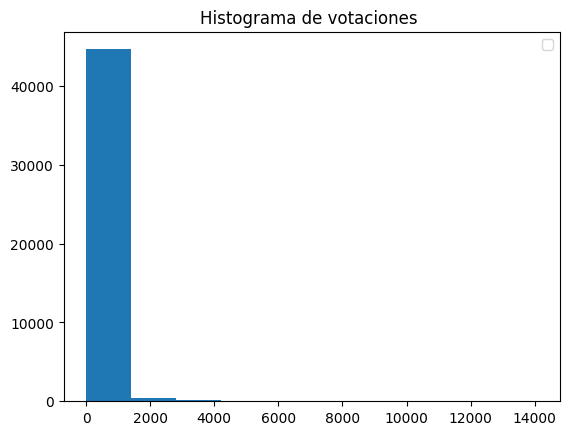

In [35]:
plt.title('Histograma de votaciones ')
plt.hist(df['vote_count'])                         
plt.legend()

## Recomendador Simple

Se realiza una serie de operaciones sobre la columna 'genres'. Se Rellenan valores nulos, posteriormente evaluamos la cadena de texto que representa una lista. Finalmente, se extraen los nombres de generos

In [5]:
df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

Calculamos la media de las votaciones promedio para las peliculas que tienen un valor no nullo en 'vote_average'. 

In [6]:
vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.244896612406511

Se calcula el percentil 95 de la serie vote_counts, es decir, el 95% de los datos que estan por debajo del quartile 0.95. Tienen un numero de votos de 434.

In [7]:
m = vote_counts.quantile(0.95)
m

434.0

Aplicamos una función a cada valor en la columna 'release_date' convertida. Esta función convierte el valor a una cadena, lo divide en el carácter '-', y toma el primer elemento de la lista resultante, que debería ser el año. Si el valor original es NaT (que se compara con `np.nan`), entonces devuelve `np.nan`.

El resultado de estas operaciones es que la columna 'year' contiene el año de la fecha de lanzamiento para cada película en el DataFrame `df`, o `np.nan` si la fecha de lanzamiento no estaba disponible o no pudo ser interpretada como una fecha.

In [8]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

Seleccionamos las filas del DataFrame `df` donde 'vote_count' es mayor o igual a `m` (un valor calculado previamente, posiblemente un umbral de conteo de votos), y donde 'vote_count' y 'vote_average' no son nulos. De estas filas, selecciona solo las columnas 'title', 'year', 'vote_count', 'vote_average', 'popularity', y 'genres'. El resultado se almacena en el nuevo DataFrame `qualified`.
Filtramos el DataFrame `df` para seleccionar solo las películas que cumplen ciertos criterios, y luego está obteniendo e imprimiendo el tamaño del conjunto de datos resultante.

In [9]:
qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(2274, 6)

Esta función calcula la calificación ponderada de una película basada en su conteo de votos, su promedio de votos, la media de votos de todas las películas, y un umbral de conteo de votos.

In [10]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

Calculamos la calificación ponderada para cada película en el DataFrame `qualified` utilizando la función `weighted_rating` y almacenando estas calificaciones ponderadas en una nueva columna 'wr'.

In [11]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [12]:
qualified = qualified.sort_values('wr', ascending=False).head(250)

Se muestran las 10 primeras filas del dataset 'qualified' que representan a las 10 peliculas recomendadas con base en la votacion de usuarios.

In [13]:
qualified.head(10)

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.108149,"[Action, Thriller, Science Fiction, Mystery, A...",7.917588
12481,The Dark Knight,2008,12269,8,123.167259,"[Drama, Action, Crime, Thriller]",7.905871
22879,Interstellar,2014,11187,8,32.213481,"[Adventure, Drama, Science Fiction]",7.897107
2843,Fight Club,1999,9678,8,63.869599,[Drama],7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,"[Adventure, Fantasy, Action]",7.871787
292,Pulp Fiction,1994,8670,8,140.950236,"[Thriller, Crime]",7.868660
314,The Shawshank Redemption,1994,8358,8,51.645403,"[Drama, Crime]",7.864000
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,"[Adventure, Fantasy, Action]",7.861927
351,Forrest Gump,1994,8147,8,48.307194,"[Comedy, Drama, Romance]",7.860656
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.423537,"[Adventure, Fantasy, Action]",7.851924


#### Recomendador basado en generos

La columna 'genres' ha sido reemplazada por una nueva columna 'genre' que contiene un solo género por fila.

In [14]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_df = df.drop('genres', axis=1).join(s)

La siguiente funcion construye un DataFrame de películas que están calificadas dentro de un cierto percentil en un género específico. 
En resumen, esta función construye un DataFrame de las 250 películas principales en un género específico que están calificadas dentro de un cierto percentil.

In [15]:
def build_chart(genre, percentile=0.85):
    df1 = gen_df[gen_df['genre'] == genre]
    vote_counts = df1[df1['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df1[df1['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df1[(df1['vote_count'] >= m) & (df['vote_count'].notnull()) & (df1['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

Recomendamos las 10 mejores peliculas de terror.

In [16]:
#Las 10 mejores peliculas de terror
build_chart('Horror').head(10)

C:\Users\ferna\AppData\Local\Temp\ipykernel_5388\4142472400.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qualified = df1[(df1['vote_count'] >= m) & (df['vote_count'].notnull()) & (df1['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]


,title,year,vote_count,vote_average,popularity,wr
1213,The Shining,1980,3890,8,19.611589,7.901294
1176,Psycho,1960,2405,8,36.826309,7.843335
1171,Alien,1979,4564,7,23.37742,6.941936
41492,Split,2016,4461,7,28.920839,6.940631
14236,Zombieland,2009,3655,7,11.063029,6.927969
1158,Aliens,1986,3282,7,21.761179,6.920081
21276,The Conjuring,2013,3169,7,14.90169,6.917338
42169,Get Out,2017,2978,7,36.894806,6.912248
1338,Jaws,1975,2628,7,19.726114,6.901088
8147,Shaun of the Dead,2004,2479,7,14.902948,6.895426
